## IMPORTS

In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# CLASIFICADOR

## CARGAR DATOS

In [3]:
data = loadmat('ex3data1.mat')
Y = data['y'].ravel()
X = data['X']

m = X.shape[0]

## MUESTRA ALEATORIA

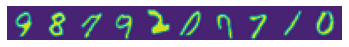

In [4]:
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample, :].reshape(-1, 20).T)
plt.axis('off')

X = np.hstack([np.ones([m, 1]), X])
n = X.shape[1]
theta = np.zeros(n)

## FUNCIÓN SIGMOIDE

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## FUNCIÓN DE COSTE

In [6]:
def coste(theta, X, Y, lam):
    m = X.shape[0]
    n = X.shape[1]

    
    h_theta = np.dot(X, theta)
    sig = sigmoid(h_theta)
    positive = np.dot(np.log(sig).T, Y)
    negative = np.dot(np.log(1 - sig).T, 1 - Y)
    J_theta = (-1 / m) * (positive + negative)
    
    # Regularizacion
    reg = (lam /(2 * m)) * np.sum(np.square(theta))
    
    # Coste Regularizado
    J_theta += reg
    
    return J_theta

## GRADIENTE

In [7]:
def gradiente(theta, X, Y, lam):
    m = X.shape[0]
    n = X.shape[1]
    
    h_theta = np.dot(X, theta.T)
    sig = sigmoid(h_theta)
    gradient = (1/m) * np.dot(sig.T - Y, X)
    
    # Regularizacion
    reg = (lam / m) * theta
    
    # Gradiente Regularizada
    gradient += reg
    
    return gradient

## ONE VS ALL

In [8]:
def oneVsAll(X, Y, num_etiquetas, lam):
    """
    oneVsAll entrena varios clasificadores por regresión logistica
    con término de regularización 'reg' y devuelve el resultado en
    una matriz, donde la fila i-ésima corresponde al clasificador
    de la etiqueta i-ésima
    """
    
    resultado = []
    
    for i in range(1, num_etiquetas + 1):

        Y_aux = (Y == i) * 1

        theta_optima, _, _ = opt.fmin_tnc(
            func=coste,
            x0 = theta,
            fprime=gradiente,
            args=(X, Y_aux, lam)
        )
        
        resultado.append(theta_optima)
        
    return np.array(resultado).T
        

theta_opt = oneVsAll(X, Y, 10, 0.1)

## PREDICCIÓN

In [9]:
def predecir(X, Y, theta):
    Y_hat = []
    for i in range(X.shape[0]):
        ejemplo = X[i]
        resultados = np.dot(ejemplo.T, theta)
        num = np.argmax(resultados) + 1   # Va de 0 a 9, no de 1 a 10 -> +1 
        Y_hat.append(num)
        
    return np.array(Y_hat)

## PRECISIÓN

In [10]:
def precision(X, Y, theta):
    Y_hat = predecir(X, Y, theta)
    
    return np.round(
        np.sum(Y_hat == Y) / m * 100,
        decimals = 2
    )

## MOSTRAR PRECISIÓN

In [11]:
print("La precisión del Clasificador es de aproximadamente un: {}%"
      .format(precision(X, Y, theta_opt)))

La precisión del Clasificador es de aproximadamente un: 96.5%


# RED NEURONAL

## CARGAR DATOS

In [12]:
data = loadmat('ex3data1.mat')
Y = data['y'].ravel()
X = data['X']
w = loadmat('ex3weights.mat')



## FORWARD PROPAGATION

In [25]:
 def forward_prop(X, Y, w):
    a1 = X
    a1 = np.hstack([np.ones([X.shape[0], 1]), a1])

    z2 = np.dot(w['Theta1'], a1.T)
    a2 = sigmoid(z2).T
    a2 = np.hstack([np.ones([a2.shape[0], 1]), a2])

    z3 = np.dot(w['Theta2'], a2.T)
    h = sigmoid(z3).T

    return h

In [22]:
def predecir_nn(X, Y, w):
    Y_hat = []
    
    pred = forward_prop(X, Y, w)
    
    for i in range(pred.shape[0]):
        ejemplo = pred[i]
        num = np.argmax(ejemplo) + 1    # Va de 0 a 9, no de 1 a 10 -> +1
        Y_hat.append(num)
    
    Y_hat = np.array(Y_hat)
    
    return Y_hat

In [26]:
def precision_nn(X, Y, w):
    Y_hat = predecir_nn(X, Y, w)
        
    return np.round(
        np.sum(Y_hat == Y) / m * 100,
        decimals = 2
    )

In [29]:
print("La precisión de la Red Neuronal es de aproximadamente un: {}%"
      .format(precision_nn(X, Y, w)))

La precisión de la Red Neuronal es de aproximadamente un: 97.52%
